In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

class sizeme():
    """ Class to change html fontsize of object's representation"""
    def __init__(self,ob, size=50, height=120):
        self.ob = ob
        self.size = size
        self.height = height
    def _repr_html_(self):
        repl_tuple = (self.size, self.height, self.ob._repr_html_())
        return u'<span style="font-size:{0}%; line-height:{1}%">{2}</span>'.format(*repl_tuple)

pd.options.display.max_columns = 999

In [2]:
template_catalog = {197790: [197802, 198372, 198376, 198380, 198384],
                    197662: [198668, 199009, 199021, 199033],
                    197408: [197400, 197404, 197412],
                    197384: [197388, 197392],
                    197371: [197367, 197375, 197379]}

In [66]:
import lsst.daf.persistence as dp
#butler = dp.Butler('decam_lzogy_forcephot')
butler = dp.Butler('decam_rescaled_diffims')

df1 = None
#for template, sciImgs in template_catalog.items():
template = 197371
sciImgs = template_catalog[template]
for science in sciImgs:
    for ccdnum in range(1, 60):
        try:
            #sources = butler.get('forced_src', visit=197367, ccdnum=ccdnum)
            sources = butler.get('forced_src', visit=science, ccdnum=ccdnum)
            tmp = pd.DataFrame({col: sources.columns[col] for col in sources.schema.getNames()})
            #print template, science, ccdnum, tmp.shape
            if df1 is None:
                df1 = tmp
            else:
                df1 = df1.append(tmp)
        except:
            continue

print df1.shape
print df1.base_PsfFlux_flag.values.sum()
print df1.base_PsfFlux_flag_edge.values.sum()
print df1.base_PsfFlux_flag_noGoodPixels.values.sum()
print df1.base_TransformedCentroid_flag.values.sum()
#print df1.ip_diffim_DipoleFit_flag_classification.values.sum()
df1.head()

(73385, 20)
246
246
0
0


,base_PsfFlux_apCorr,base_PsfFlux_apCorrSigma,base_PsfFlux_flag,base_PsfFlux_flag_apCorr,base_PsfFlux_flag_edge,base_PsfFlux_flag_noGoodPixels,base_PsfFlux_flux,base_PsfFlux_fluxSigma,base_TransformedCentroid_flag,base_TransformedCentroid_x,base_TransformedCentroid_y,classification_dipole,coord_dec,coord_ra,diffim_base_PsfFlux_flux,diffim_base_PsfFlux_fluxSigma,objectId,parentObjectId,template_base_PsfFlux_flux,template_base_PsfFlux_fluxSigma
0,NaN,NaN,False,False,False,False,34594.214678,64.849700,False,576.721680,45.911247,1,-0.096097,3.306273,1878.971988,30458.796431,84768485325931010,0,33674.272380,42941.503046
1,NaN,NaN,False,False,False,False,-168.488874,65.732164,False,129.943329,52.033791,0,-0.095529,3.306282,-375.440830,3369.305094,84768485325931011,0,205.374436,9118.612816
2,NaN,NaN,False,False,False,False,256.457667,66.200053,False,1685.921631,62.955055,0,-0.097508,3.306291,423.435786,74.738126,84768485325931012,0,-153.469066,67.399019
3,NaN,NaN,False,False,False,False,20911.451783,64.515138,False,948.497681,78.063354,0,-0.096570,3.306313,6.644579,72.496342,84768485325931013,0,21969.893203,65.271439
4,NaN,NaN,False,False,False,False,30191.248920,66.138192,False,1715.939575,82.966141,1,-0.097546,3.306316,-1532.043638,74.567010,84768485325931014,0,34016.881213,66.916833


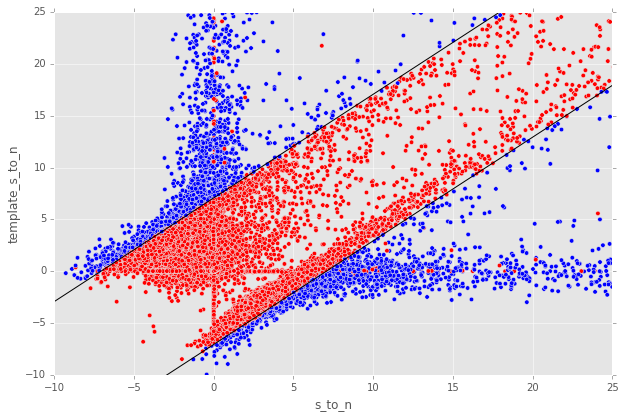

In [67]:
df1[['base_PsfFlux_flux', 'template_base_PsfFlux_flux']].head()
df1['s_to_n'] = df1.base_PsfFlux_flux / df1.base_PsfFlux_fluxSigma
df1['template_s_to_n'] = df1.template_base_PsfFlux_flux / df1.template_base_PsfFlux_fluxSigma
df1['diff_s_to_n'] = (df1.base_PsfFlux_flux - df1.template_base_PsfFlux_flux) / \
    np.sqrt(df1.base_PsfFlux_fluxSigma**2. + df1.template_base_PsfFlux_fluxSigma**2.)
#df1[['s_to_n', 'template_s_to_n']].head()

plt.rcParams['figure.figsize'] = (10.0, 6.5)
#colors = np.where(df1.ip_diffim_DipoleFit_flag_classification == 1, 'r', 'k')
colors = np.where(np.abs(df1.diff_s_to_n) > 5., 'b', 'r')
df1.plot.scatter('s_to_n', 'template_s_to_n', c=colors)
plt.xlim(-10, 25)
plt.ylim(-10, 25)
x = np.linspace(-25,25)
plt.plot(x, x-5*np.sqrt(2), 'k-')
plt.plot(x, x+5*np.sqrt(2), 'k-')

In [70]:
import lsst.daf.persistence as dp
butler = dp.Butler('decam_lzogy_forcephot')
#butler = dp.Butler('decam_rescaled_diffims')

df2 = None
#for template, sciImgs in template_catalog.items():
template = 197371
sciImgs = template_catalog[template]
for science in sciImgs:
    for ccdnum in range(1, 60):
        try:
            #sources = butler.get('forced_src', visit=197367, ccdnum=ccdnum)
            sources = butler.get('forced_src', visit=science, ccdnum=ccdnum)
            tmp = pd.DataFrame({col: sources.columns[col] for col in sources.schema.getNames()})
            tmp['visit'] = science
            tmp['ccdnum'] = ccdnum
            #print template, science, ccdnum, tmp.shape
            if df2 is None:
                df2 = tmp
            else:
                df2 = df2.append(tmp)
        except:
            continue

print df2.shape
print df2.base_PsfFlux_flag.values.sum()
print df2.base_PsfFlux_flag_edge.values.sum()
print df2.base_PsfFlux_flag_noGoodPixels.values.sum()
print df2.base_TransformedCentroid_flag.values.sum()
print df2.ip_diffim_DipoleFit_flag_classification.values.sum()
df2.head()

(15307, 19)
0
0
0
0
14619


,base_PsfFlux_flag,base_PsfFlux_flag_edge,base_PsfFlux_flag_noGoodPixels,base_PsfFlux_flux,base_PsfFlux_fluxSigma,base_TransformedCentroid_flag,base_TransformedCentroid_x,base_TransformedCentroid_y,coord_dec,coord_ra,diffim_base_PsfFlux_flux,diffim_base_PsfFlux_fluxSigma,ip_diffim_DipoleFit_flag_classification,objectId,parentObjectId,template_base_PsfFlux_flux,template_base_PsfFlux_fluxSigma,visit,ccdnum
0,False,False,False,228325.765148,64.927817,False,580.871704,44.437531,-0.096103,3.306271,NaN,NaN,1,84768485325930644,0,219337.314316,77554.123544,197367,1
1,False,False,False,121484.933682,66.221419,False,1719.858643,81.998299,-0.097551,3.306315,490.807477,97.123202,1,84768485325930645,0,120444.657894,66.748707,197367,1
2,False,False,False,21132.459896,64.630456,False,947.150513,79.010269,-0.096568,3.306314,492.006111,92.947726,1,84768485325930646,0,20962.723287,65.216365,197367,1
3,False,False,False,12797.162212,64.733823,False,437.135010,101.025322,-0.095920,3.306344,436.663707,92.902064,1,84768485325930647,0,12251.410768,65.456288,197367,1
4,False,False,False,17933.955778,66.194887,False,1801.230591,292.843292,-0.097655,3.306584,-766.556470,96.756228,1,84768485325930648,0,19850.600662,66.555246,197367,1


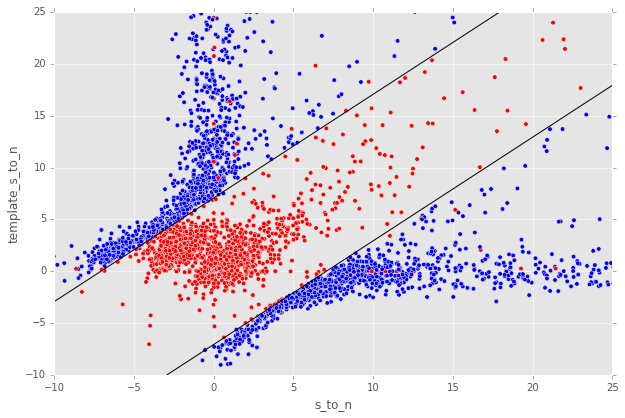

In [71]:
df2[['base_PsfFlux_flux', 'template_base_PsfFlux_flux']].head()
df2['s_to_n'] = df2.base_PsfFlux_flux / df2.base_PsfFlux_fluxSigma
df2['template_s_to_n'] = df2.template_base_PsfFlux_flux / df2.template_base_PsfFlux_fluxSigma
df2['diff_s_to_n'] = (df2.base_PsfFlux_flux - df2.template_base_PsfFlux_flux) / \
    np.sqrt(df2.base_PsfFlux_fluxSigma**2. + df2.template_base_PsfFlux_fluxSigma**2.)
#df[['s_to_n', 'template_s_to_n']].head()

plt.rcParams['figure.figsize'] = (10.0, 6.5)
#colors = np.where(df2.ip_diffim_DipoleFit_flag_classification == 1, 'r', 'k')
colors = np.where(np.abs(df2.diff_s_to_n) > 5., 'b', 'r')
df2.plot.scatter('s_to_n', 'template_s_to_n', c=colors)
plt.xlim(-10, 25)
plt.ylim(-10, 25)
x = np.linspace(-25,25)
plt.plot(x, x-5*np.sqrt(2), 'k-')
plt.plot(x, x+5*np.sqrt(2), 'k-')

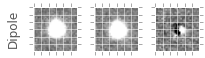

In [62]:
import diffimTests as dit
reload(dit);
plt.rcParams['figure.figsize'] = (15.0, 6.5)
dit.mosaicDIASources('decam_lzogy_forcephot', visitid=197367, ccdnum=1, xnear=1720, ynear=82)

Look at some sources near the blob at (0, 0)

(46, 22)


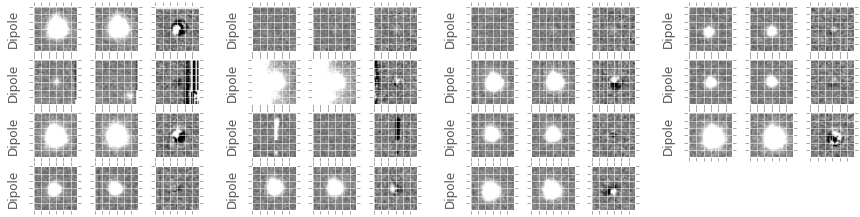

In [63]:
tmp_df = df[(df.s_to_n.abs() <= 0.1) & (df.template_s_to_n.abs() <= 0.1)]
print tmp_df.shape
dit.mosaicDIASources('decam_lzogy_forcephot', visitid=197367, ccdnum=1, \
                     xnear=tmp_df.base_TransformedCentroid_x, ynear=tmp_df.base_TransformedCentroid_y)

In [64]:
sizeme(tmp_df.head())

,base_PsfFlux_flag,base_PsfFlux_flag_edge,base_PsfFlux_flag_noGoodPixels,base_PsfFlux_flux,base_PsfFlux_fluxSigma,base_TransformedCentroid_flag,base_TransformedCentroid_x,base_TransformedCentroid_y,coord_dec,coord_ra,diffim_base_PsfFlux_flux,diffim_base_PsfFlux_fluxSigma,ip_diffim_DipoleFit_flag_classification,objectId,parentObjectId,template_base_PsfFlux_flux,template_base_PsfFlux_fluxSigma,visit,ccdnum,s_to_n,template_s_to_n,diff_s_to_n
25,False,False,False,153.862809,67113.090033,False,1584.039673,1161.865234,-0.097381,3.307695,-940.747322,157172.020335,1,84768485325930669,0,1537.038135,66278.418174,197367,1,0.002293,0.023191,-0.014664
52,False,False,False,827.301461,15638.548163,False,1211.101196,2492.911377,-0.102651,3.314830,-3033.608091,70420.231009,1,84768523980636366,0,3965.628228,48584.890780,197367,10,0.052901,0.081623,-0.061488
53,False,False,False,383.232962,5728.376256,False,1239.125977,2477.047119,-0.102687,3.314810,-1530.937119,39303.681918,1,84768523980636367,0,2217.628215,35636.257505,197367,10,0.066901,0.062230,-0.050823
56,False,False,False,3147.716617,48288.453407,False,1217.411621,2509.709229,-0.102659,3.314852,2682.449180,67117.034371,1,84768523980636370,0,490.765070,14730.079005,197367,10,0.065186,0.033317,0.052628
78,False,False,False,2350.266702,24869.820886,False,1637.449341,3425.771484,-0.103195,3.316022,2054.542167,23636.478174,1,84768523980636392,0,-27.159385,51671.460661,197367,10,0.094503,-0.000526,0.041458


Try the blob near (-2.5, 2.5)

(24, 22)


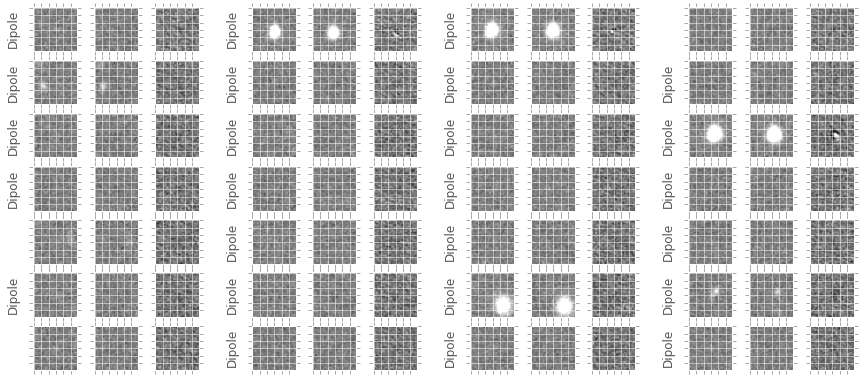

In [65]:
reload(dit)
tmp_df = df[((df.s_to_n - -2.5).abs() <= 0.25) & ((df.template_s_to_n - 2.5).abs() <= 0.25)]
print tmp_df.shape
dit.mosaicDIASources('decam_lzogy_forcephot', visitid=197367, ccdnum=31, \
                     xnear=tmp_df.base_TransformedCentroid_x, ynear=tmp_df.base_TransformedCentroid_y)

Compare photometry between the two dataframes... first find the overlapping sources.

In [112]:
df1a = df1.ix[np.abs(df1.diff_s_to_n) > 5.]
df2a = df2.ix[np.abs(df2.diff_s_to_n) > 5.]
print df1.shape, df2.shape, float(df1.shape[0])/float(df2.shape[0]), df1a.shape, df2a.shape

(73385, 23) (15307, 22) 4.79421179852 (13459, 23) (10517, 22)


In [85]:
dist = np.sqrt(np.add.outer(df1a.coord_dec, -df2a.coord_dec)**2. + \
               np.add.outer(df1a.coord_ra, -df2a.coord_ra)**2.) * 206264.806247  # convert to arcsec ?
print dist.shape

(13459, 10517)


In [165]:
print np.sum(dist < 0.5)
matches = np.where(dist < 0.5)
#print matches
print dist[0,0], df1a.iloc[0].coord_dec, df1a.iloc[0].coord_ra, '\t', df2a.iloc[0].coord_dec, df2a.iloc[0].coord_ra

matches1 = df1a.iloc[matches[0]]
matches2 = df2a.iloc[matches[1]]

fluxes1 = matches1.diffim_base_PsfFlux_flux.values
fluxes2 = matches2.diffim_base_PsfFlux_flux.values

fluxSigs1 = matches1.diffim_base_PsfFlux_fluxSigma.values
fluxSigs2 = matches2.diffim_base_PsfFlux_fluxSigma.values

isgood = ~np.isnan(fluxes1) & ~np.isnan(fluxes2)
isgood = isgood & (np.abs(fluxes1/fluxSigs1) > 5.0)
isgood = isgood & ~np.isnan(fluxSigs1) & ~np.isnan(fluxSigs2) 
isgood = isgood & (np.abs(fluxes2/fluxSigs2) > 5.0)

fluxes1 = fluxes1[isgood]
fluxes2 = fluxes2[isgood]
fluxSigs1 = np.sqrt(fluxSigs1[isgood])
fluxSigs2 = np.sqrt(fluxSigs2[isgood])

13316
202.282637918 -0.0965700381566 3.3063125603 	-0.0975507289772 3.30631501916


[  0.8962796   35.95710934] [  3.16816367e-03   3.03383569e+01]
0.898025953753 1.15170509984
[ 1.19079845 -0.79046425] [ 0.02205748  0.18522123]
1.09367151544
[ 0.80907677  4.1489783 ] [  2.86119801e-03   3.29119776e+00]
0.819855822436 1.04561081206


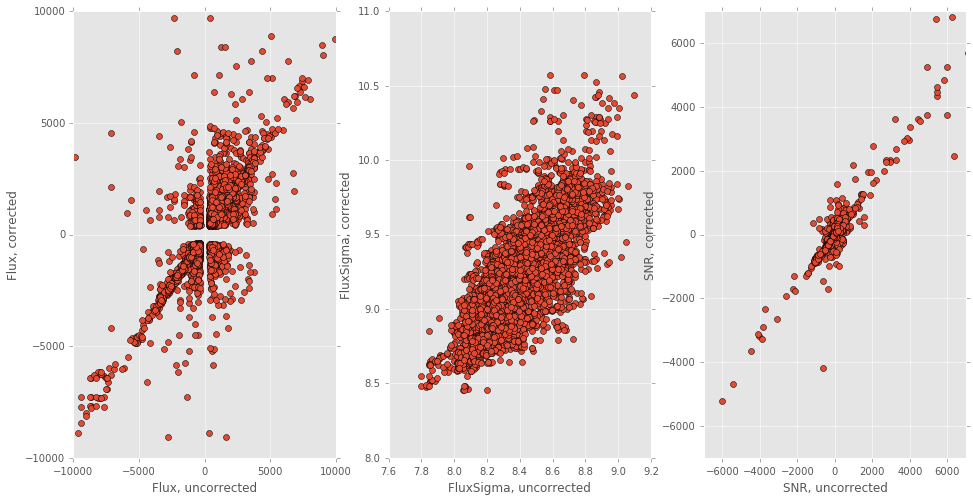

In [205]:
pars, cov = np.polyfit(fluxes1, fluxes2, deg=1, cov=True)
print pars, np.sqrt(np.diag(cov))
#print pearsonr(fluxes2, fluxes1)
print np.median(fluxes2/fluxes1), np.std(fluxes2/fluxes1)

pars, cov = np.polyfit(fluxSigs1, fluxSigs2, deg=1, cov=True)
print pars, np.sqrt(np.diag(cov))
#print pearsonr(fluxSigs2, fluxSigs1)
print np.median(fluxSigs2/fluxSigs1)

pars, cov = np.polyfit(fluxes1/fluxSigs1, fluxes2/fluxSigs2, deg=1, cov=True)
print pars, np.sqrt(np.diag(cov))
#print pearsonr(fluxSigs2, fluxSigs1)
print np.median((fluxes2/fluxSigs2)/(fluxes1/fluxSigs1)), np.std((fluxes2/fluxSigs2)/(fluxes1/fluxSigs1))

plt.figure(1, (16,8))
plt.subplot(131)
plt.plot(fluxes1, fluxes2, 'o')
plt.xlim(-10000, 10000); plt.ylim(-10000, 10000); plt.xlabel('Flux, uncorrected'); plt.ylabel('Flux, corrected')
plt.subplot(132)
plt.plot(fluxSigs1, fluxSigs2, 'o')
plt.ylim(8, 11); plt.xlabel('FluxSigma, uncorrected'); plt.ylabel('FluxSigma, corrected')
plt.subplot(133)
plt.plot((fluxes1/fluxSigs1), fluxes2/fluxSigs2, 'o')
plt.xlim(-7000, 7000); plt.ylim(-7000, 7000); plt.xlabel('SNR, uncorrected'); plt.ylabel('SNR, corrected')

Try robust regression on fluxes and signal-to-noise. See [here](https://stackoverflow.com/questions/10231206/can-scipy-stats-identify-and-mask-obvious-outliers)

[ 1.02386961]


(-1000, 1000)

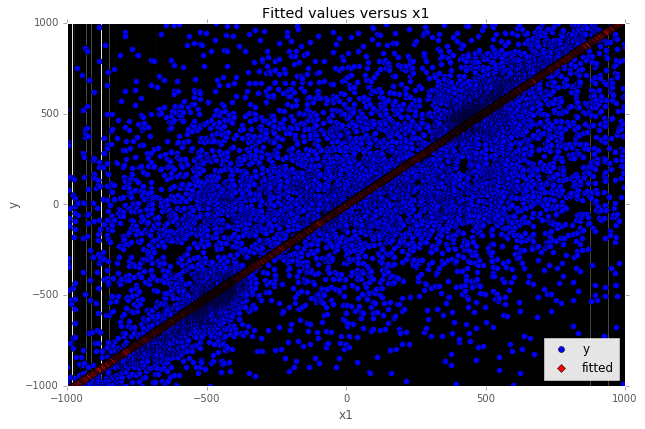

In [157]:
import statsmodels.api as smapi
import statsmodels.graphics as smgraphics
regression = smapi.OLS(fluxes1, fluxes2).fit()
print regression.params
# Find outliers #
#test = regression.outlier_test()
#test2 = np.array([t[2] for t in test])
#print (test2 < 0.5).sum()
figure = smgraphics.regressionplots.plot_fit(regression, 0)
plt.xlim(-1000, 1000); plt.ylim(-1000, 1000)

OK, let's get statistics on the images themselves from the logfiles... see [here](https://stackoverflow.com/questions/89228/calling-an-external-command-in-python)

(0, 400)

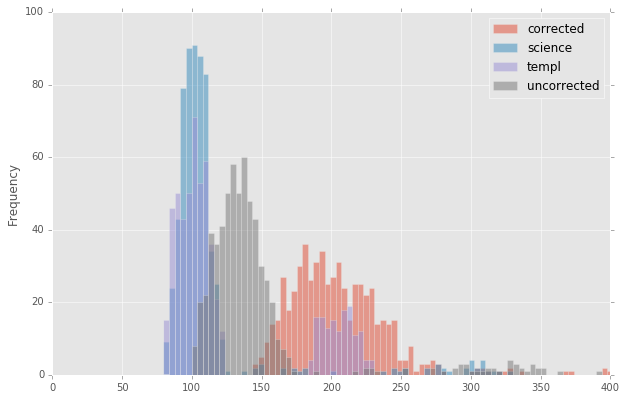

In [145]:
import os
x = np.array(os.popen("grep -R 'Variance (template)' decam_lzogy_logs/* | awk '{print $4}'").read().split('\n'), dtype='|S')
templ_vars = x[x != ''].astype(float)
x = np.array(os.popen("grep -R 'Variance (science)' decam_lzogy_logs/* | awk '{print $4}'").read().split('\n'), dtype='|S')
sci_vars = x[x != ''].astype(float)
x = np.array(os.popen("grep -R 'Variance (uncorrected diffim)' decam_lzogy_logs/* | awk '{print $5}'").read().split('\n'), dtype='|S')
uncor_vars = x[x != ''].astype(float)
x = np.array(os.popen("grep -R 'Variance (corrected diffim)' decam_lzogy_logs/* | awk '{print $5}'").read().split('\n'), dtype='|S')
cor_vars = x[x != ''].astype(float)

df = pd.DataFrame({'templ': templ_vars, 'science': sci_vars, 'uncorrected': uncor_vars, 'corrected': cor_vars})
df.plot.hist(alpha=0.5, bins=200)
plt.xlim(0, 400)

(100, 800)

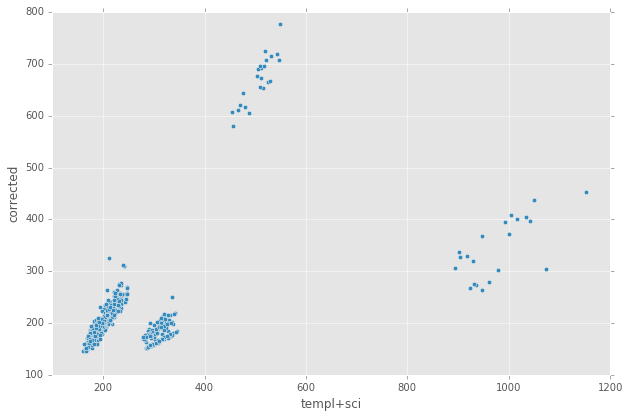

In [200]:
df['templ+sci'] = templ_vars + sci_vars
#plt.plot(templ_vars + sci_vars, cor_vars, 'o')
df.plot.scatter(x='templ+sci', y='corrected')
plt.xlim(100, 1200); plt.ylim(100, 800)

27
146
621 621
188469.0 730301.0 3.87491311568


(0, 1000)

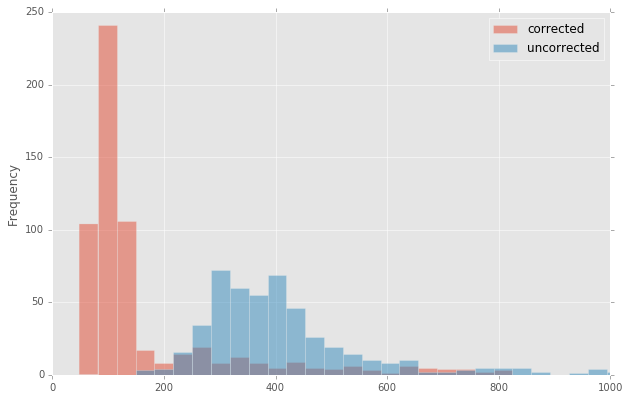

In [190]:
x = np.array(os.popen("grep -R 'Merging detections into' decam_lzogy_logs/* | awk '{print $5}'").read().split('\n'), dtype='|S')
detections = x[x != ''].astype(float)
print len(detections[detections >= 1000.])
x = np.array(os.popen("grep -R 'Merging detections into' decam_rescaled_diffims_logs/* | awk '{print $5}'").read().split('\n'), dtype='|S')
detections2 = x[x != ''].astype(float)
print len(detections2[detections2 >= 1000.])
print len(detections), len(detections2)
print detections.sum(), detections2.sum(), detections2.sum()/detections.sum()
det_df = pd.DataFrame({'corrected': detections, 'uncorrected': detections2})
det_df.plot.hist(alpha=0.5, bins=500);
plt.xlim(0, 1000)

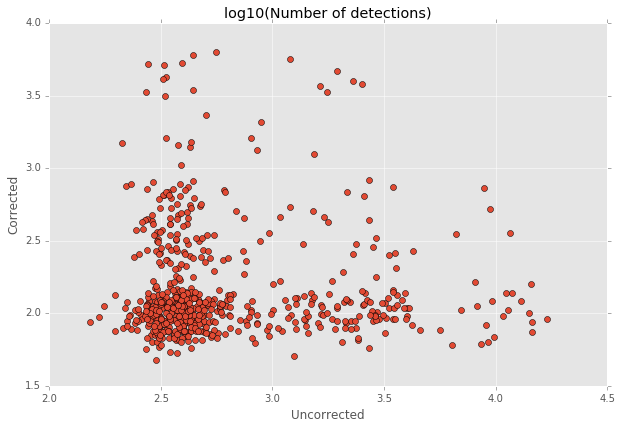

In [201]:
plt.plot(np.log10(detections2), np.log10(detections), 'o')
plt.title('log10(Number of detections)'); plt.xlabel('Uncorrected'); plt.ylabel('Corrected')